In [61]:
!dir ..

README.md  notebooks  requirements.txt


In [62]:
import os
import json

# Create an empty list to store the dictionaries
json_data_list = []

# Directory where your JSON files are located
json_files_directory = '../../DataEng/datalake/bronze'

# Loop through each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.startswith('data_') and filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)

        # Open and read the JSON file
        with open(file_path, 'r') as json_file:
            # Load the JSON data into a dictionary
            json_data = json.load(json_file)

            # Create a new dictionary to hold both the file name and JSON data
            json_with_filename = {
                'filename': filename,  # Save the file name
                'data': json_data     # Save the JSON data
            }

            # Append the dictionary to the list
            json_data_list.append(json_with_filename)

# Now, json_data_list contains a list of dictionaries, where each dictionary has a 'filename' key
# with the name of the JSON file and a 'data' key with the JSON data from that file for files starting with 'data_'.


In [63]:
json_data_list[0]

{'filename': 'data_20231010082403.json',
 'data': {'targetAmount': 500000.0,
  'raisedAmount': 5148832.0,
  'supporters': 5032,
  'targetDate': '2023-11-10'}}

In [64]:
import pandas as pd


# Create a DataFrame
df = pd.DataFrame(json_data_list)

# If you want to flatten the 'data' dictionary into separate columns:
df = pd.concat([df.drop(['data'], axis=1), df['data'].apply(pd.Series)], axis=1)

# Now, df contains your data in a Pandas DataFrame format
df


,filename,targetAmount,raisedAmount,supporters,targetDate
0,data_20231010082403.json,500000.0,5148832.0,5032,2023-11-10
1,data_20231008210704.json,500000.0,4731772.0,4495,2023-11-10
2,data_20231008222404.json,500000.0,4847103.0,4650,2023-11-10
3,data_20231014135304.json,500000.0,5639204.0,5286,2023-11-10
4,data_20231013182804.json,500000.0,5617834.0,5263,2023-11-10
...,...,...,...,...,...
5565,data_20231008000803.json,500000.0,3886294.0,3560,2023-11-10
5566,data_20231012232403.json,500000.0,5584608.0,5225,2023-11-10
5567,data_20231009000504.json,500000.0,5037869.0,4877,2023-11-10
5568,data_20231013225004.json,500000.0,5624933.0,5275,2023-11-10


In [65]:
# Extract and transform the 'filename' column into a timestamp column
df['timestamp'] = pd.to_datetime(df['filename'].str.extract(r'data_(\d{14})\.json')[0], format='%Y%m%d%H%M%S')

# Drop the 'filename' column if no longer needed
df = df.drop('filename', axis=1)

# Now, df contains a 'timestamp' column extracted from the 'filename'
df.head()


,targetAmount,raisedAmount,supporters,targetDate,timestamp
0,500000.0,5148832.0,5032,2023-11-10,2023-10-10 08:24:03
1,500000.0,4731772.0,4495,2023-11-10,2023-10-08 21:07:04
2,500000.0,4847103.0,4650,2023-11-10,2023-10-08 22:24:04
3,500000.0,5639204.0,5286,2023-11-10,2023-10-14 13:53:04
4,500000.0,5617834.0,5263,2023-11-10,2023-10-13 18:28:04


In [66]:
#save df to csv on the silver layer name ghanor
df.drop(columns=['targetAmount', 'targetDate']).to_csv('../../DataEng/datalake/silver/ghanor.csv', index=False)

In [67]:
df.drop(columns=["targetAmount", "targetDate"], inplace=True)

In [68]:
df.head(10)

,raisedAmount,supporters,timestamp
0,5148832.0,5032,2023-10-10 08:24:03
1,4731772.0,4495,2023-10-08 21:07:04
2,4847103.0,4650,2023-10-08 22:24:04
3,5639204.0,5286,2023-10-14 13:53:04
4,5617834.0,5263,2023-10-13 18:28:04
5,5138702.0,5020,2023-10-09 23:19:04
6,5488571.0,5153,2023-10-11 16:03:05
7,5405730.0,5055,2023-10-10 14:42:03
8,5660177.0,5306,2023-10-14 20:30:04
9,4830483.0,4630,2023-10-08 22:19:03


In [69]:
df.sort_values(by='raisedAmount', ascending=False, inplace=True)

In [70]:
df.head(10)

,raisedAmount,supporters,timestamp
351,5661718.0,5306,2023-10-14 22:15:04
4423,5661718.0,5306,2023-10-14 22:14:04
3703,5661718.0,5306,2023-10-14 22:02:04
5060,5661718.0,5306,2023-10-14 22:07:04
5120,5661718.0,5306,2023-10-14 22:04:05
4088,5661718.0,5306,2023-10-14 22:08:04
4250,5661718.0,5306,2023-10-14 22:18:04
951,5661718.0,5306,2023-10-14 22:12:04
2109,5661718.0,5306,2023-10-14 22:05:04
3839,5661718.0,5306,2023-10-14 22:17:04


In [71]:
df['raisedAmount'].max()

5661718.0

# trasnformação campanha atual

In [72]:
import pandas as pd

# Assuming you have a DataFrame named df with the given columns
# Convert the 'timestamp' column to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the date (day) from the 'timestamp' column
df['date'] = df['timestamp'].dt.date

# Group by 'date' and calculate the sum of 'raisedAmount' for each day
df_grouped = df.groupby('date')['raisedAmount'].first().reset_index()

df_grouped

,date,raisedAmount
0,2023-10-06,3000000.0
1,2023-10-07,3880107.0
2,2023-10-08,5028131.0
3,2023-10-09,5139841.0
4,2023-10-10,5450447.0
5,2023-10-11,5510656.0
6,2023-10-12,5584927.0
7,2023-10-13,5624933.0
8,2023-10-14,5661718.0


In [73]:
# Convert 'paid_at' column to datetime
df_grouped['date'] = pd.to_datetime(df_grouped['date'])

# Calculate the number of days from the start date
start_date = df_grouped['date'].min()  # Get the minimum date as the start date
df_grouped['days_from_start'] = (df_grouped['date'] - start_date).dt.days

df_grouped


,date,raisedAmount,days_from_start
0,2023-10-06,3000000.0,0
1,2023-10-07,3880107.0,1
2,2023-10-08,5028131.0,2
3,2023-10-09,5139841.0,3
4,2023-10-10,5450447.0,4
5,2023-10-11,5510656.0,5
6,2023-10-12,5584927.0,6
7,2023-10-13,5624933.0,7
8,2023-10-14,5661718.0,8


In [74]:
df_grouped['total_amount'] = df_grouped['raisedAmount'].diff()

#fill the first value with the fist value
df_grouped['total_amount'].fillna(df_grouped['raisedAmount'], inplace=True)

df_grouped

,date,raisedAmount,days_from_start,total_amount
0,2023-10-06,3000000.0,0,3000000.0
1,2023-10-07,3880107.0,1,880107.0
2,2023-10-08,5028131.0,2,1148024.0
3,2023-10-09,5139841.0,3,111710.0
4,2023-10-10,5450447.0,4,310606.0
5,2023-10-11,5510656.0,5,60209.0
6,2023-10-12,5584927.0,6,74271.0
7,2023-10-13,5624933.0,7,40006.0
8,2023-10-14,5661718.0,8,36785.0


In [75]:
import pandas as pd

# Assuming you already have a DataFrame df

# Create a list to store the filtered rows as DataFrames
filtered_rows = []

# Initialize a variable to keep track of the previous raisedAmount
previous_raisedAmount = float('-inf')

# Iterate through the rows of the original DataFrame
for index, row in df.iterrows():
    current_raisedAmount = row['raisedAmount']

    # Check if the current raisedAmount is smaller or equal to the previous one
    if current_raisedAmount <= previous_raisedAmount:
        # Append the row to the list of filtered rows
        filtered_rows.append(row)

    # Update the previous_raisedAmount for the next iteration
    previous_raisedAmount = current_raisedAmount

# Create a new DataFrame by concatenating the filtered rows
filtered_df = pd.concat(filtered_rows, axis=1).T

# Reset the index of the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# filtered_df now contains the rows where raisedAmount is not greater than the previous one
filtered_df


,raisedAmount,supporters,timestamp,date
0,5661718.0,5306,2023-10-14 22:14:04,2023-10-14
1,5661718.0,5306,2023-10-14 22:02:04,2023-10-14
2,5661718.0,5306,2023-10-14 22:07:04,2023-10-14
3,5661718.0,5306,2023-10-14 22:04:05,2023-10-14
4,5661718.0,5306,2023-10-14 22:08:04,2023-10-14
...,...,...,...,...
5564,3511255.0,3152,2023-10-07 14:10:15,2023-10-07
5565,3511114.0,3152,2023-10-07 14:13:03,2023-10-07
5566,3510664.0,3151,2023-10-07 14:12:04,2023-10-07
5567,3510405.0,3151,2023-10-07 14:08:43,2023-10-07


In [76]:
filtered_df.shape

(5569, 4)

In [77]:
df.shape

(5570, 4)

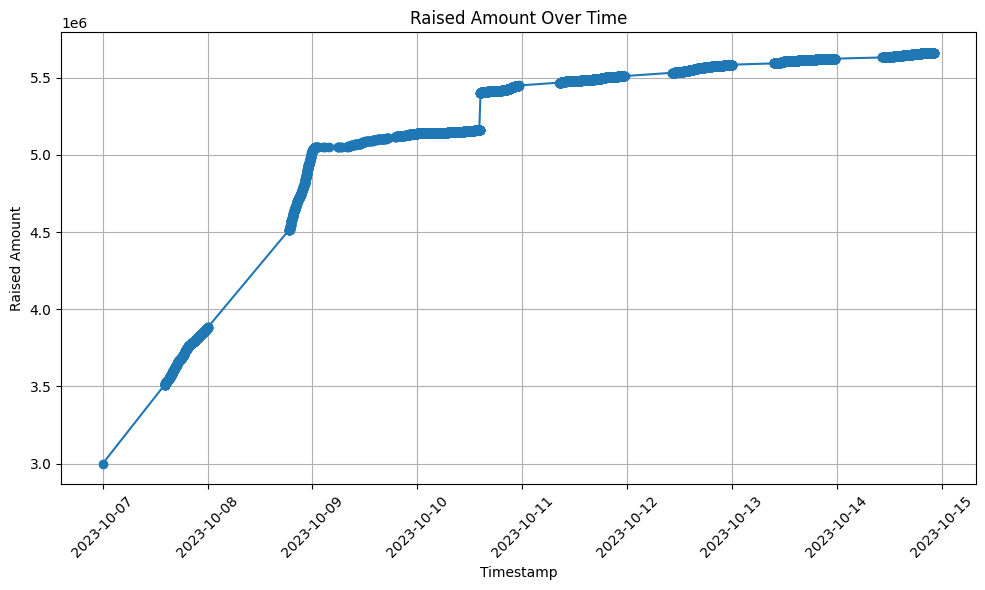

In [78]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called filtered_df with the data

# Extract the data from the DataFrame
raisedAmount = filtered_df['raisedAmount']
timestamp = filtered_df['timestamp']

# Convert the 'timestamp' column to datetime objects
timestamp = pd.to_datetime(timestamp)

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(timestamp, raisedAmount, marker='o', linestyle='-')
plt.title('Raised Amount Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Raised Amount')
plt.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# dados das outras campanhas

In [79]:
import os

directory_path = json_files_directory  # Replace with the path to your directory
prefix = 'data'  # Replace with the prefix you want to filter

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter files that don't start with the specified prefix
filtered_files = [file for file in all_files if not file.startswith(prefix)]

# Print the filtered file names
for file in filtered_files:
    print(file)


last_saved.json
project_contributions_per_day_ordem.json
project_contributions_per_day_nerdcastrpg.json


In [80]:
import pandas as pd

# File paths for the JSON files
file_path_ordem = directory_path+'/project_contributions_per_day_ordem.json'
file_path_nerdcastrpg = directory_path+'/project_contributions_per_day_nerdcastrpg.json'

# Read the JSON files into Pandas DataFrames
df_ordem = pd.read_json(file_path_ordem)
df_nerdcastrpg = pd.read_json(file_path_nerdcastrpg)

# Now you have two DataFrames: df_ordem and df_nerdcastrpg

In [81]:
print(df_ordem)

   project_id                                             source
0      122021  [{'paid_at': '2020-10-17', 'created_at': '2020...


In [82]:
import pandas as pd
import json

# File path for the JSON file
file_path = file_path_ordem

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Normalize the nested "source" column
df_ordem = pd.json_normalize(data, 'source', ['project_id'])

# Now you have a Pandas DataFrame with flattened data
df_ordem

,paid_at,created_at,total,total_amount,project_id
0,2020-10-17,2020-10-17,3007,524949.27,122021
1,2020-10-18,2020-10-18,5652,648096.97,122021
2,2020-10-19,2020-10-19,2174,256318.27,122021
3,2020-10-20,2020-10-20,2503,319434.94,122021
4,2020-10-21,2020-10-21,1404,175432.50,122021
...,...,...,...,...,...
57,2020-12-13,2020-12-13,432,56500.00,122021
58,2020-12-14,2020-12-14,579,80470.00,122021
59,2020-12-15,2020-12-15,1442,185226.12,122021
60,2020-12-16,2020-12-16,2441,297603.48,122021


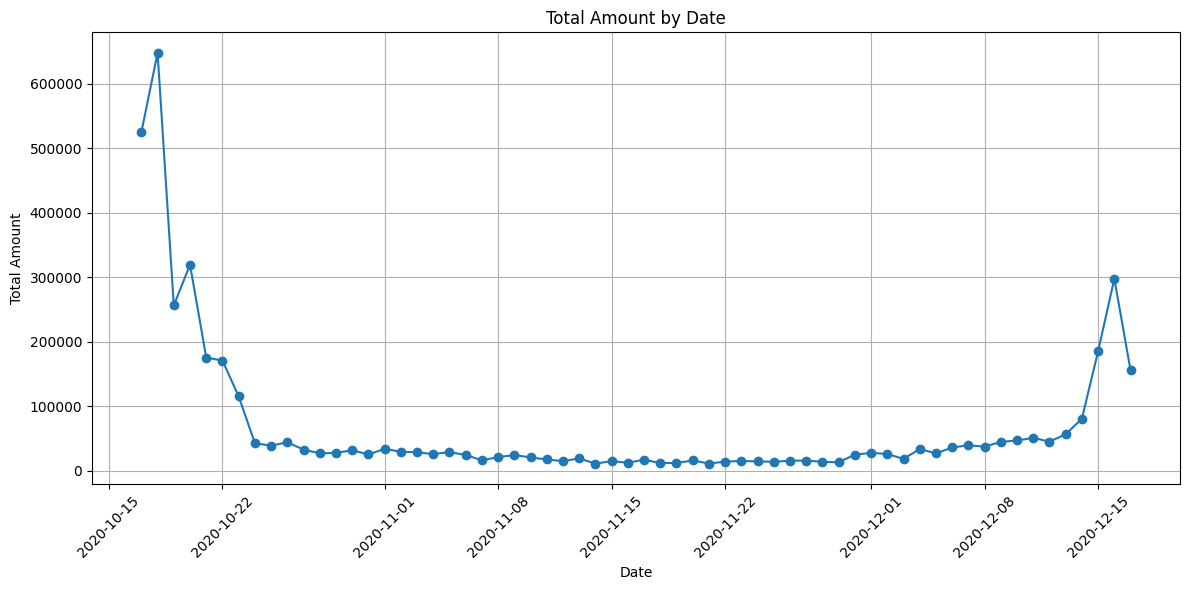

In [83]:
df = df_ordem

# Assuming you have a DataFrame 'df' with columns 'paid_at' and 'total_amount'
plt.figure(figsize=(12, 6))  # Set the figure size

# Convert the 'paid_at' column to datetime if it's not already
df['paid_at'] = pd.to_datetime(df['paid_at'])

# Sort the DataFrame by the 'paid_at' column to ensure it's plotted in chronological order
df.sort_values(by='paid_at', inplace=True)

# Create the line plot
plt.plot(df['paid_at'], df['total_amount'], marker='o', linestyle='-')

# Customize the plot
plt.title('Total Amount by Date')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [84]:
import pandas as pd
import json

# File path for the JSON file
file_path = file_path_nerdcastrpg

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Normalize the nested "source" column
df_nerdcastrpg = pd.json_normalize(data, 'source', ['project_id'])

# Now you have a Pandas DataFrame with flattened data
df_nerdcastrpg

,paid_at,created_at,total,total_amount,project_id
0,2020-12-04,2020-12-04,6073,3139564.13,127019
1,2020-12-05,2020-12-05,1944,946702.23,127019
2,2020-12-06,2020-12-06,1449,674971.00,127019
3,2020-12-07,2020-12-07,606,249626.66,127019
4,2020-12-08,2020-12-08,210,56796.66,127019
...,...,...,...,...,...
58,2021-01-31,2021-01-31,659,133481.00,127019
59,2021-02-01,2021-02-01,1545,316943.41,127019
60,2021-02-02,2021-02-02,2721,562961.01,127019
61,2021-02-03,2021-02-03,2220,385996.01,127019


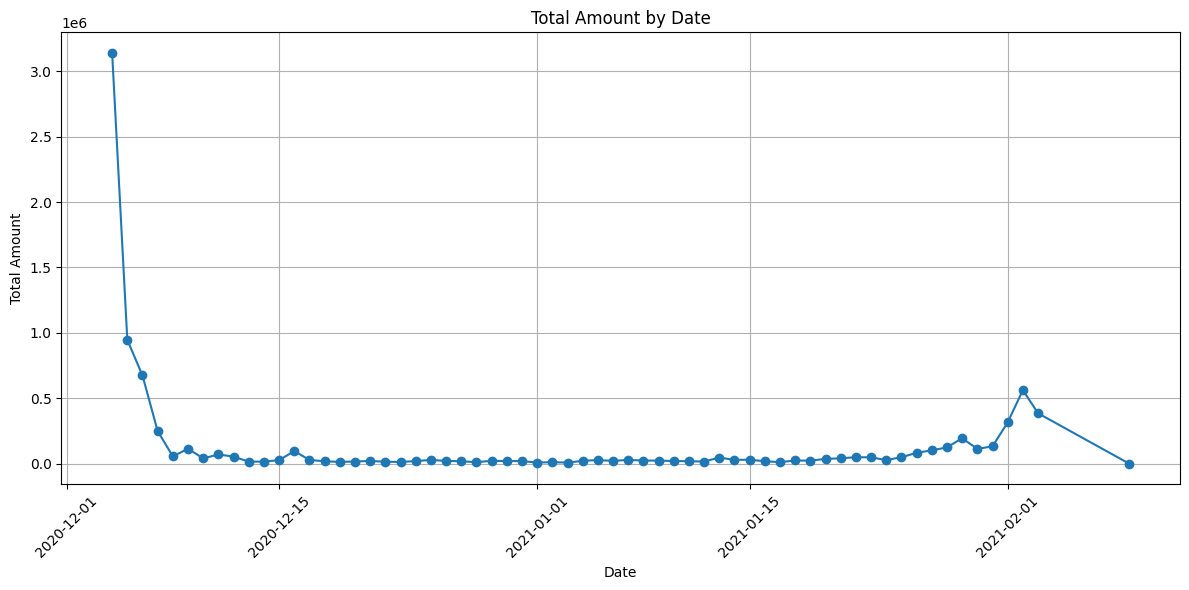

In [85]:
df = df_nerdcastrpg

# Assuming you have a DataFrame 'df' with columns 'paid_at' and 'total_amount'
plt.figure(figsize=(12, 6))  # Set the figure size

# Convert the 'paid_at' column to datetime if it's not already
df['paid_at'] = pd.to_datetime(df['paid_at'])

# Sort the DataFrame by the 'paid_at' column to ensure it's plotted in chronological order
df.sort_values(by='paid_at', inplace=True)

# Create the line plot
plt.plot(df['paid_at'], df['total_amount'], marker='o', linestyle='-')

# Customize the plot
plt.title('Total Amount by Date')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


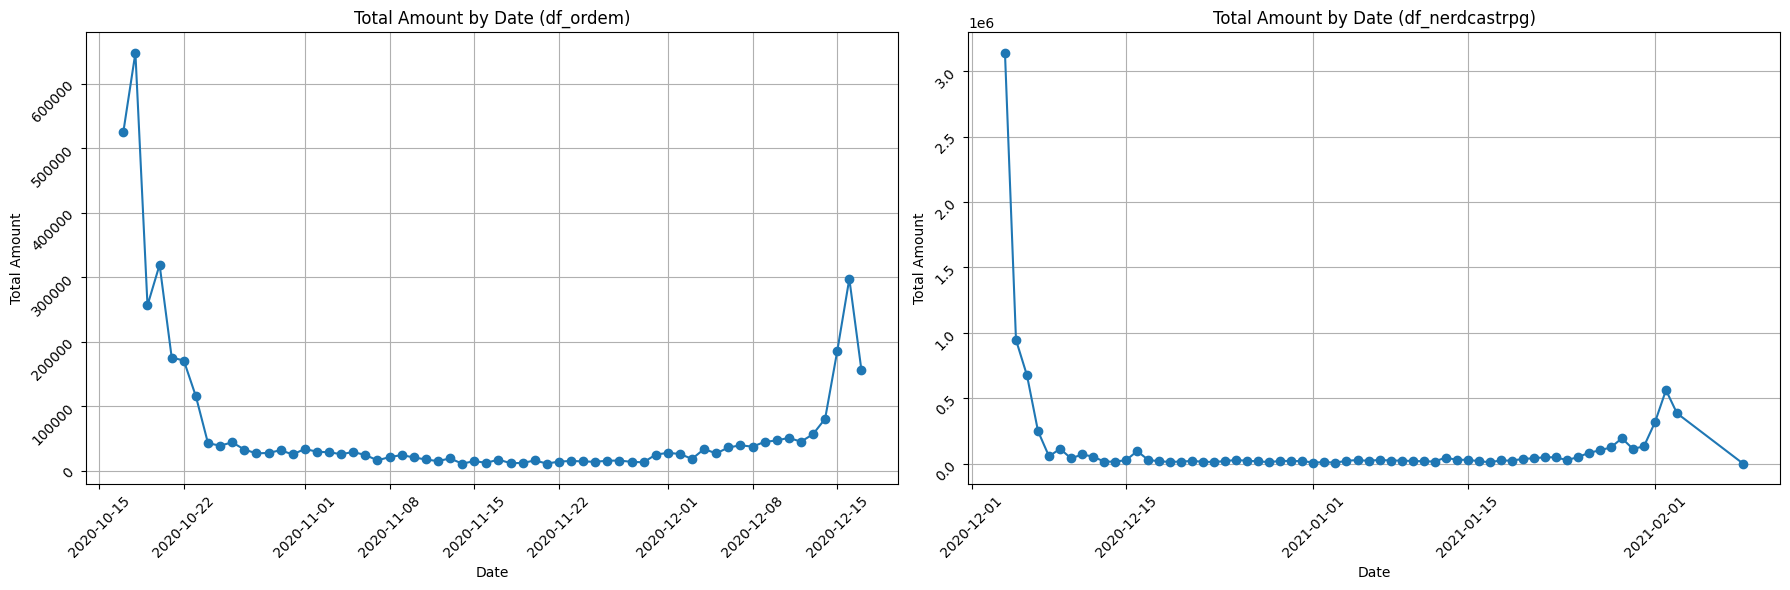

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have DataFrames 'df_ordem' and 'df_nerdcastrpg' with columns 'paid_at' and 'total_amount'

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for df_ordem
df_ordem['paid_at'] = pd.to_datetime(df_ordem['paid_at'])
df_ordem.sort_values(by='paid_at', inplace=True)
axes[0].plot(df_ordem['paid_at'], df_ordem['total_amount'], marker='o', linestyle='-')
axes[0].set_title('Total Amount by Date (df_ordem)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Amount')
axes[0].grid(True)
axes[0].tick_params(rotation=45)

# Plot for df_nerdcastrpg
df_nerdcastrpg['paid_at'] = pd.to_datetime(df_nerdcastrpg['paid_at'])
df_nerdcastrpg.sort_values(by='paid_at', inplace=True)
axes[1].plot(df_nerdcastrpg['paid_at'], df_nerdcastrpg['total_amount'], marker='o', linestyle='-')
axes[1].set_title('Total Amount by Date (df_nerdcastrpg)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Amount')
axes[1].grid(True)
axes[1].tick_params(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


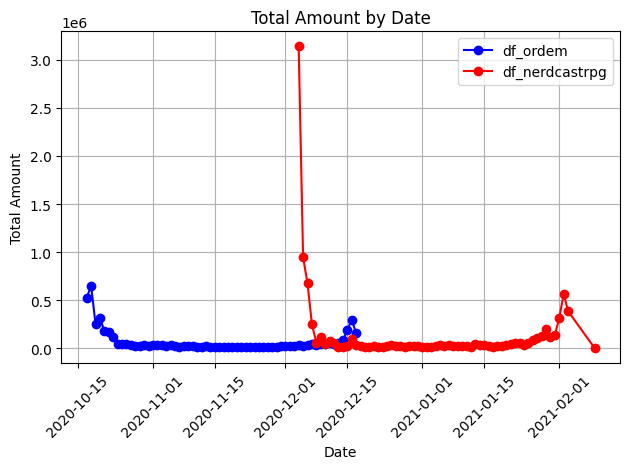

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have DataFrames 'df_ordem' and 'df_nerdcastrpg' with columns 'paid_at' and 'total_amount'

# Convert the 'paid_at' column to datetime if it's not already
df_ordem['paid_at'] = pd.to_datetime(df_ordem['paid_at'])
df_nerdcastrpg['paid_at'] = pd.to_datetime(df_nerdcastrpg['paid_at'])

# Sort the DataFrames by the 'paid_at' column to ensure they're plotted in chronological order
df_ordem.sort_values(by='paid_at', inplace=True)
df_nerdcastrpg.sort_values(by='paid_at', inplace=True)

# Create the line plot for df_ordem (blue color)
plt.plot(df_ordem['paid_at'], df_ordem['total_amount'], marker='o', linestyle='-', label='df_ordem', color='blue')

# Create the line plot for df_nerdcastrpg (red color)
plt.plot(df_nerdcastrpg['paid_at'], df_nerdcastrpg['total_amount'], marker='o', linestyle='-', label='df_nerdcastrpg', color='red')

# Customize the plot
plt.title('Total Amount by Date')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [88]:
# Convert 'paid_at' column to datetime
df_nerdcastrpg['paid_at'] = pd.to_datetime(df_nerdcastrpg['paid_at'])

# Calculate the number of days from the start date
start_date = df_nerdcastrpg['paid_at'].min()  # Get the minimum date as the start date
df_nerdcastrpg['days_from_start'] = (df_nerdcastrpg['paid_at'] - start_date).dt.days

df_nerdcastrpg


,paid_at,created_at,total,total_amount,project_id,days_from_start
0,2020-12-04,2020-12-04,6073,3139564.13,127019,0
1,2020-12-05,2020-12-05,1944,946702.23,127019,1
2,2020-12-06,2020-12-06,1449,674971.00,127019,2
3,2020-12-07,2020-12-07,606,249626.66,127019,3
4,2020-12-08,2020-12-08,210,56796.66,127019,4
...,...,...,...,...,...,...
58,2021-01-31,2021-01-31,659,133481.00,127019,58
59,2021-02-01,2021-02-01,1545,316943.41,127019,59
60,2021-02-02,2021-02-02,2721,562961.01,127019,60
61,2021-02-03,2021-02-03,2220,385996.01,127019,61


In [89]:
# Convert 'paid_at' column to datetime
df_ordem['paid_at'] = pd.to_datetime(df_ordem['paid_at'])

# Calculate the number of days from the start date
start_date = df_ordem['paid_at'].min()  # Get the minimum date as the start date
df_ordem['days_from_start'] = (df_ordem['paid_at'] - start_date).dt.days

df_ordem


,paid_at,created_at,total,total_amount,project_id,days_from_start
0,2020-10-17,2020-10-17,3007,524949.27,122021,0
1,2020-10-18,2020-10-18,5652,648096.97,122021,1
2,2020-10-19,2020-10-19,2174,256318.27,122021,2
3,2020-10-20,2020-10-20,2503,319434.94,122021,3
4,2020-10-21,2020-10-21,1404,175432.50,122021,4
...,...,...,...,...,...,...
57,2020-12-13,2020-12-13,432,56500.00,122021,57
58,2020-12-14,2020-12-14,579,80470.00,122021,58
59,2020-12-15,2020-12-15,1442,185226.12,122021,59
60,2020-12-16,2020-12-16,2441,297603.48,122021,60


# Comaparando as 3 campanhas

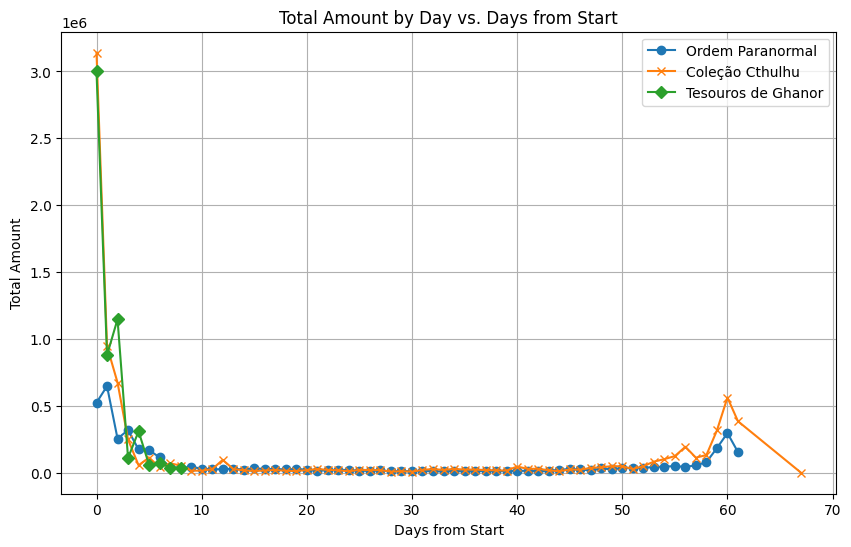

In [90]:
import matplotlib.pyplot as plt

# Assuming you have two DataFrames named df_ordem and df_nerdcastrpg

# Plotting df_ordem
plt.figure(figsize=(10, 6))
plt.plot(df_ordem['days_from_start'], df_ordem['total_amount'], label='Ordem Paranormal', marker='o')

# Plotting df_nerdcastrpg
plt.plot(df_nerdcastrpg['days_from_start'], df_nerdcastrpg['total_amount'], label='Coleção Cthulhu', marker='x')

plt.plot(df_grouped['days_from_start'], df_grouped['total_amount'], label='Tesouros de Ghanor', marker='D')

plt.xlabel('Days from Start')
plt.ylabel('Total Amount')
plt.title('Total Amount by Day vs. Days from Start')
plt.legend()
plt.grid(True)

plt.show()
